In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load trained model
model = load_model("leaf_classifier_model.h5")

# Load test data and class names
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
class_names = np.load("classes.npy")

In [3]:
# Get predicted probabilities
pred_probs = model.predict(X_test)

# Convert one-hot encoded y_test and predictions back to class indices
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(pred_probs, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


In [4]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

Classification Report:

                             precision    recall  f1-score   support

 Pepper_bell_Bacterial_spot       0.67      0.77      0.71        13
        Pepper_bell_healthy       0.62      0.77      0.69        13
         Potato_Late_blight       0.44      0.62      0.52        13
             Potato_heatlhy       0.75      0.46      0.57        13
      Tomato_Bacterial_spot       0.65      0.85      0.73        13
 Tomato_Septorial_leaf_spot       0.50      0.23      0.32        13
Tomato__Tomato_mosaic_virus       0.71      0.83      0.77        12
             Tomato_healthy       0.89      0.62      0.73        13

                   accuracy                           0.64       103
                  macro avg       0.65      0.64      0.63       103
               weighted avg       0.65      0.64      0.63       103



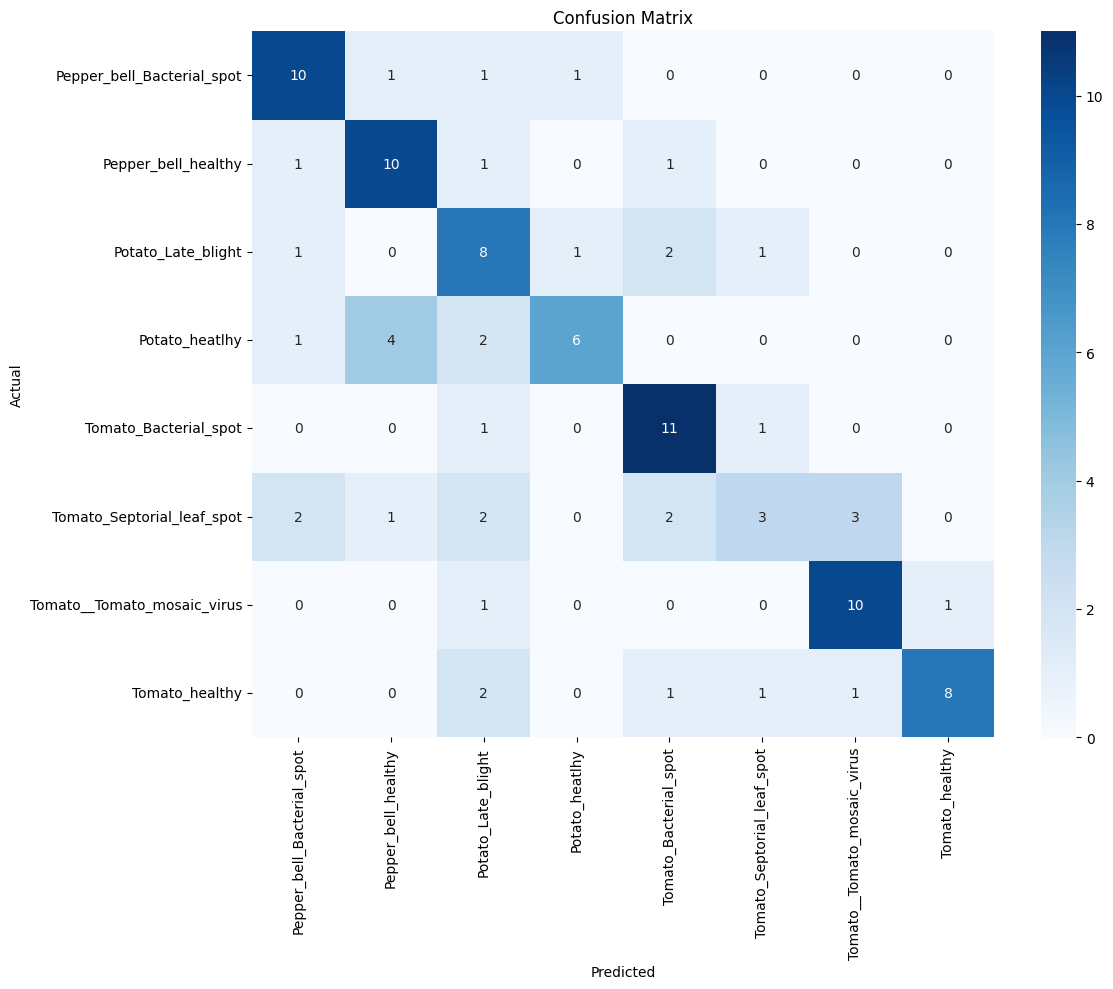

In [5]:
plt.figure(figsize=(12, 10))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=class_names,
    yticklabels=class_names,
    cmap="Blues",
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [7]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print(f"✅ Accuracy on test data: {accuracy * 100:.2f}%")

✅ Accuracy on test data: 64.08%


## Prediction using Image data


In [8]:
import cv2

# Load and preprocess image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (128, 128))  # Resize
    image = image.astype("float32") / 255.0  # Normalize
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

In [9]:
image_path = "test_images/potato_healthy.JPG"  # change this to our image path
new_image = preprocess_image(image_path)
prediction = model.predict(new_image)
predicted_class = class_names[np.argmax(prediction)]

print("✅ Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
✅ Predicted class: Potato_heatlhy


In [11]:
image_path = "test_images/tomato_septorialleafspot (2).JPG"  # change this to our image path
new_image = preprocess_image(image_path)
prediction = model.predict(new_image)
predicted_class = class_names[np.argmax(prediction)]

print("✅ Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
✅ Predicted class: Tomato_Septorial_leaf_spot
